In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
train=pd.read_csv("C:/Users/monik/Desktop/Untitled Folder/titanic/train.csv")
test=pd.read_csv("C:/Users/monik/Desktop/Untitled Folder/titanic/test.csv")

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape,test.shape

((891, 12), (418, 11))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


C:\Users\monik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

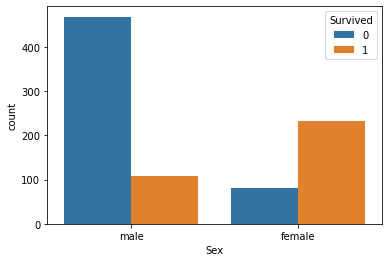

In [10]:
sns.countplot(train['Sex'],hue=train['Survived'])

In [13]:
train[["Survived","Embarked"]]

,Survived,Embarked
0,0,S
1,1,C
2,1,S
3,1,S
4,0,S
...,...,...
886,0,S
887,1,S
888,0,S
889,1,C


In [16]:
train[["Survived"]].groupby(train["Embarked"]).count()

,Survived
Embarked,
C,168
Q,77
S,644


C:\Users\monik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

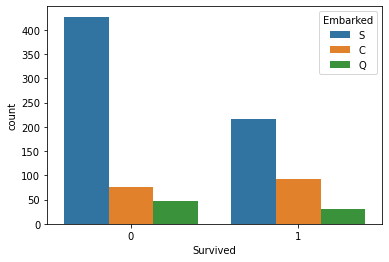

In [17]:
sns.countplot(train["Survived"],hue=train["Embarked"])

In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


C:\Users\monik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

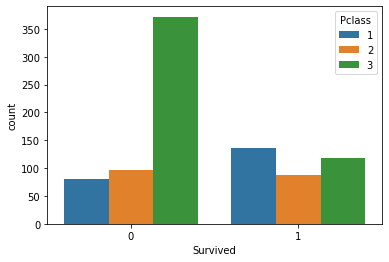

In [20]:
sns.countplot(train["Survived"],hue=train["Pclass"])

In [21]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:>

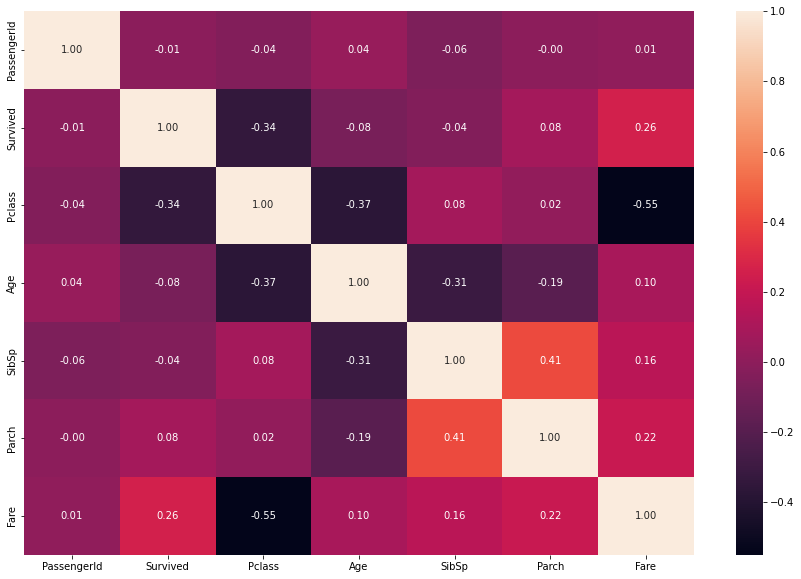

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True, fmt=".2f")

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
train["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
train["Age"].fillna(train["Age"].mean(),inplace=True)
test["Fare"].fillna(test["Fare"].mean(),inplace=True)
test["Age"].fillna(train["Age"].mean(),inplace=True)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
trn=[]
for i in train.columns.values:
    if i not in ["PassengerId","Name","Ticket","Cabin"]:
        trn.append(i)
train=train[trn]

In [90]:
train=pd.get_dummies(train,columns=["Sex","Embarked"])

In [91]:
train.columns.values.tolist()

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [92]:
input=  [i for i in train.columns.values.tolist() if i not in ["Survived"]]
train_X= train[input]

In [93]:
train_X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [94]:
train_Y=train["Survived"]

In [78]:
tst=[]
for i in test.columns.values:
    if i not in ["PassengerId","Name","Ticket","Cabin"]:
        tst.append(i)
test=test[tst]

pd.get_dummies(test,columns=["Sex","Embarked"])

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,0,1,0,1,0
1,3,47.000000,1,0,7.0000,1,0,0,0,1
2,2,62.000000,0,0,9.6875,0,1,0,1,0
3,3,27.000000,0,0,8.6625,0,1,0,0,1
4,3,22.000000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,0,1,0,0,1
414,1,39.000000,0,0,108.9000,1,0,1,0,0
415,3,38.500000,0,0,7.2500,0,1,0,0,1
416,3,29.699118,0,0,8.0500,0,1,0,0,1


In [79]:
input=  [i for i in test.columns.values.tolist() if i not in ["Survived"]]
test_X= test[input]

In [84]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,29.699118,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,29.699118,0,0,8.0500,S


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf =rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7798507462686567

In [97]:
train_X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0
